In [1]:
from nltk.corpus import stopwords
sentences = ['sky is nice','cloud is nice','sky is nice and cloud is nice']
cleaned_sentence = []
for sent in sentences:
    word = sent.lower() # lower all sent so it dosnot treat upper case and lowercase differently
    worwd = word.split()
    # remove the stop words
    words = [w for w in word if w not in set(stopwords.words('english'))]
    word = " ".join(word)
    cleaned_sentence.append(word)

print(cleaned_sentence)

['s k y   i s   n i c e', 'c l o u d   i s   n i c e', 's k y   i s   n i c e   a n d   c l o u d   i s   n i c e']


In [2]:
from nltk.corpus import stopwords
sentences = ['sky is nice','cloud is nice','sky is nice and cloud is nice']
cleaned_sentence = []
for sent in sentences:
    word = sent.lower() # lower all sent so it dosnot treat upper case and lowercase differently
    worwd = word.split()
    # remove the stop words
    words = [w for w in word if w not in set(stopwords.words('english'))]
    word = "".join(word)
    cleaned_sentence.append(word)

print(cleaned_sentence)

['sky is nice', 'cloud is nice', 'sky is nice and cloud is nice']


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3)
bagofwords=cv.fit_transform(cleaned_sentence)

bagofwords.toarray()

array([[0, 1, 1],
       [1, 1, 1],
       [1, 2, 2]], dtype=int64)

In [6]:
import pandas as pd
pd.DataFrame(bagofwords.toarray(),columns=['cloud','nice','sky'])

,cloud,nice,sky
0,0,1,1
1,1,1,1
2,1,2,2


In [7]:
cv.vocabulary_

{'is': 1, 'nice': 2, 'cloud': 0}

In [12]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
sentences = ['Game of Thrones is an amazing tv series!', 
             'Game of Thrones is the best tv series!', 
             'Game of Thrones is so great']
cleaned_sentence = []
for sent in sentences:
    word = sent.lower()
    word = sent.split()
    word = [w for w in word if w not in set(stopwords.words('english'))]
    word = "".join(word)
    cleaned_sentence.append(word)
print(cleaned_sentence)

# feature extracrion
cv = CountVectorizer()
bagofwords = cv.fit_transform(cleaned_sentence).toarray()
print(cv.vocabulary_)
print(bagofwords)

['GameThronesamazingtvseries!', 'GameThronesbesttvseries!', 'GameThronesgreat']
{'gamethronesamazingtvseries': 0, 'gamethronesbesttvseries': 1, 'gamethronesgreat': 2}
[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [13]:
################################ With logic##################################
sen=' '.join(cleaned_sentence)
l=list(set(sen.split()))
print("vocabulary:",l)
d={}
l1=[]
for sentence in cleaned_sentence:
    for i in l:
        if i in sentence:
            d[i]=1
        else:
            d[i]=0
    myKeys = list(d.keys())
    myKeys.sort()
    sorted_dict = {i: d[i] for i in myKeys}
    l1.append(sorted_dict)

print(l1)
l2=[i.values() for i in l1]
l2

vocabulary: ['GameThronesbesttvseries!', 'GameThronesamazingtvseries!', 'GameThronesgreat']
[{'GameThronesamazingtvseries!': 1, 'GameThronesbesttvseries!': 0, 'GameThronesgreat': 0}, {'GameThronesamazingtvseries!': 0, 'GameThronesbesttvseries!': 1, 'GameThronesgreat': 0}, {'GameThronesamazingtvseries!': 0, 'GameThronesbesttvseries!': 0, 'GameThronesgreat': 1}]


[dict_values([1, 0, 0]), dict_values([0, 1, 0]), dict_values([0, 0, 1])]

In [14]:
# Creating word histogram
import nltk
word2count = {}
for data in sentences:
    words = nltk.word_tokenize(data) # we are split into words
    for word in words:               # we are calling each word
        if word not in word2count.keys(): # if the word not in dictionary, we are 
            word2count[word] = 1
        else:
            word2count[word] += 1
print(word2count)

{'Game': 3, 'of': 3, 'Thrones': 3, 'is': 3, 'an': 1, 'amazing': 1, 'tv': 2, 'series': 2, '!': 2, 'the': 1, 'best': 1, 'so': 1, 'great': 1}


(array([1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
        0., 0., 1., 0., 0., 1.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ,
         3.3,  3.6,  3.9,  4.2,  4.5,  4.8,  5.1,  5.4,  5.7,  6. ,  6.3,
         6.6,  6.9,  7.2,  7.5,  7.8,  8.1,  8.4,  8.7,  9. ,  9.3,  9.6,
         9.9, 10.2, 10.5, 10.8, 11.1, 11.4, 11.7, 12. ]),
 <BarContainer object of 40 artists>)

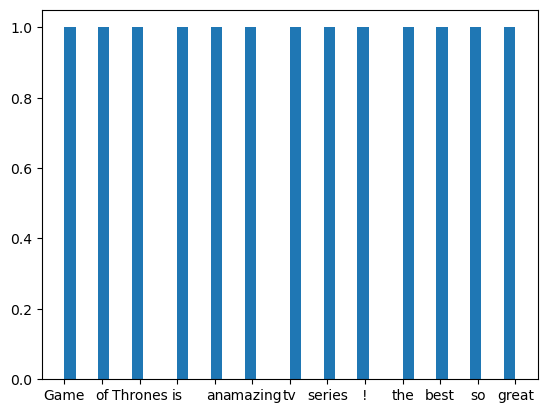

In [15]:
import matplotlib.pyplot as plt
plt.hist(word2count,bins=40)